In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import shapely as shp
import matplotlib.patheffects as PathEffects
% matplotlib inline

# Loading the dataset

In [2]:
overview = gpd.read_file('overview.geojson')
overview.head()

,NAME,TOTPOP_CY,x,y,Total injuries,Total mortalities,Number of traffic accidents,Number of people involved in traffic accidents,Number of Accidents including damages,Number of Accidents including injuries,Number of Accidents including mortalities,Percentage of Accidents including damages,Percentage of Accidents including injuries,Percentage of Accidents including mortalities,Accidents per 1000 population,Involvment in traffic accidents per 1000 population,Injuries 1000 population,Mortalities per 1000 population,geometry
0,Makkah,3261577,-398222.616706,2.366203e+06,3400.0,609.0,44915.0,88472.0,43146.0,1311.0,458.0,96.061449,2.918847,1.019704,13.770946,27.125529,1.042441,0.186719,MULTIPOLYGON Z (((-456710.530 2650896.255 0.00...
1,Aseer,2264096,-352045.193083,2.127645e+06,2192.0,696.0,25964.0,50085.0,24608.0,771.0,585.0,94.777384,2.969496,2.253120,11.467712,22.121412,0.968157,0.307407,MULTIPOLYGON Z (((-308858.199 2319738.780 0.00...
2,Tabouk,962936,-698604.846811,3.091249e+06,977.0,293.0,10034.0,9905.0,9247.0,573.0,214.0,92.156667,5.710584,2.132749,10.420215,10.286250,1.014605,0.304278,MULTIPOLYGON Z (((-789203.443 3344744.803 0.00...
3,Jazan,1643752,-377562.520722,1.923485e+06,2112.0,563.0,19572.0,33268.0,18046.0,1098.0,428.0,92.203147,5.610055,2.186797,11.906906,20.239063,1.284865,0.342509,MULTIPOLYGON Z (((-419719.167 1993300.107 0.00...
4,Al-Baha,500452,-509430.926111,2.256117e+06,935.0,111.0,1764.0,3918.0,1193.0,490.0,81.0,67.630385,27.777778,4.591837,3.524814,7.828923,1.868311,0.221799,"POLYGON Z ((-497258.929 2331363.256 0.000, -49..."


# Fixing the dataset so its per 10000

In [3]:
overview[['Accidents per 1000 population',
       'Involvment in traffic accidents per 1000 population',
       'Injuries 1000 population', 'Mortalities per 1000 population']] = overview[['Accidents per 1000 population',
       'Involvment in traffic accidents per 1000 population',
       'Injuries 1000 population', 'Mortalities per 1000 population']]*10

overview.rename(columns={'Accidents per 1000 population':'Accidents per 10,000 population',
       'Involvment in traffic accidents per 1000 population':'Involvment in traffic accidents per 10,000 population',
       'Injuries 1000 population':'Injuries 10,000 population',
        'Mortalities per 1000 population':'Mortalities per 10,000 population'}, inplace = True)

overview.head()

,NAME,TOTPOP_CY,x,y,Total injuries,Total mortalities,Number of traffic accidents,Number of people involved in traffic accidents,Number of Accidents including damages,Number of Accidents including injuries,Number of Accidents including mortalities,Percentage of Accidents including damages,Percentage of Accidents including injuries,Percentage of Accidents including mortalities,"Accidents per 10,000 population","Involvment in traffic accidents per 10,000 population","Injuries 10,000 population","Mortalities per 10,000 population",geometry
0,Makkah,3261577,-398222.616706,2.366203e+06,3400.0,609.0,44915.0,88472.0,43146.0,1311.0,458.0,96.061449,2.918847,1.019704,137.709458,271.255285,10.424405,1.867195,MULTIPOLYGON Z (((-456710.530 2650896.255 0.00...
1,Aseer,2264096,-352045.193083,2.127645e+06,2192.0,696.0,25964.0,50085.0,24608.0,771.0,585.0,94.777384,2.969496,2.253120,114.677116,221.214118,9.681568,3.074075,MULTIPOLYGON Z (((-308858.199 2319738.780 0.00...
2,Tabouk,962936,-698604.846811,3.091249e+06,977.0,293.0,10034.0,9905.0,9247.0,573.0,214.0,92.156667,5.710584,2.132749,104.202148,102.862496,10.146053,3.042778,MULTIPOLYGON Z (((-789203.443 3344744.803 0.00...
3,Jazan,1643752,-377562.520722,1.923485e+06,2112.0,563.0,19572.0,33268.0,18046.0,1098.0,428.0,92.203147,5.610055,2.186797,119.069057,202.390628,12.848654,3.425091,MULTIPOLYGON Z (((-419719.167 1993300.107 0.00...
4,Al-Baha,500452,-509430.926111,2.256117e+06,935.0,111.0,1764.0,3918.0,1193.0,490.0,81.0,67.630385,27.777778,4.591837,35.248136,78.289227,18.683110,2.217995,"POLYGON Z ((-497258.929 2331363.256 0.000, -49..."


# plotting

### adding the loc_name field used to plot the names

In [5]:
overview['loc_name'] = list(zip(overview.x,overview.y))

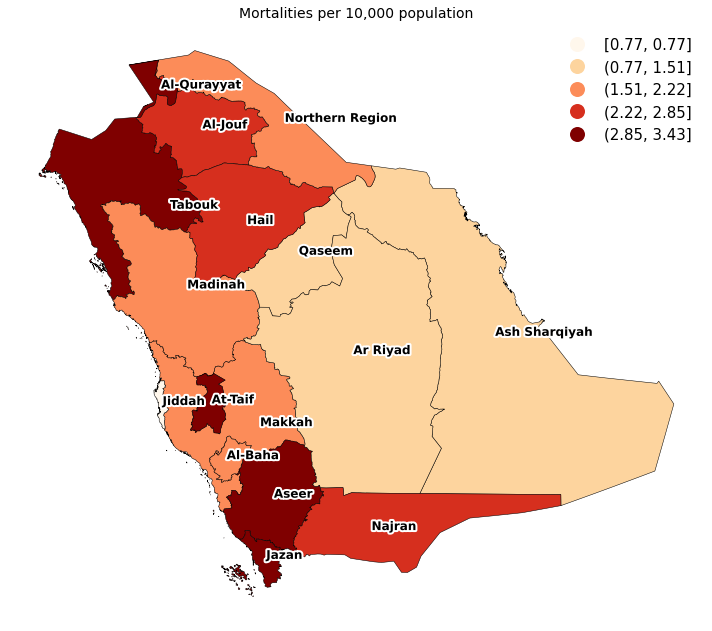

In [22]:
to_plot= ['Accidents per 10,000 population',
       'Involvment in traffic accidents per 10,000 population',
       'Injuries 10,000 population', 'Mortalities per 10,000 population']
fig, ax = plt.subplots(figsize = (10,10))
for i in np.arange(len(to_plot)):
    ax.clear()
    overview.plot(ax=ax, column = to_plot[i], scheme = 'NaturalBreaks', k = 5, cmap = 'OrRd',
                 edgecolor = 'k', linewidth = 0.5, legend = True,
                  legend_kwds = {'fontsize':15,'markerscale':1.5, 'framealpha':0})
    for idx, row in overview.iterrows():
        plt.annotate(text = row.NAME , xy = row.loc_name, fontsize =12, weight = 'bold',
                     path_effects=[PathEffects.withStroke(linewidth=4, foreground="w")])
    ax.set_title(to_plot[i], size = 14)
    #ax.grid(color = 'k', alpha = 0.1)
    ax.axis('off')
    plt.tight_layout()
    plt.savefig(('output/new_overview_per1000pop '+str(to_plot[i])+'_map.jpg'), dpi = 300)

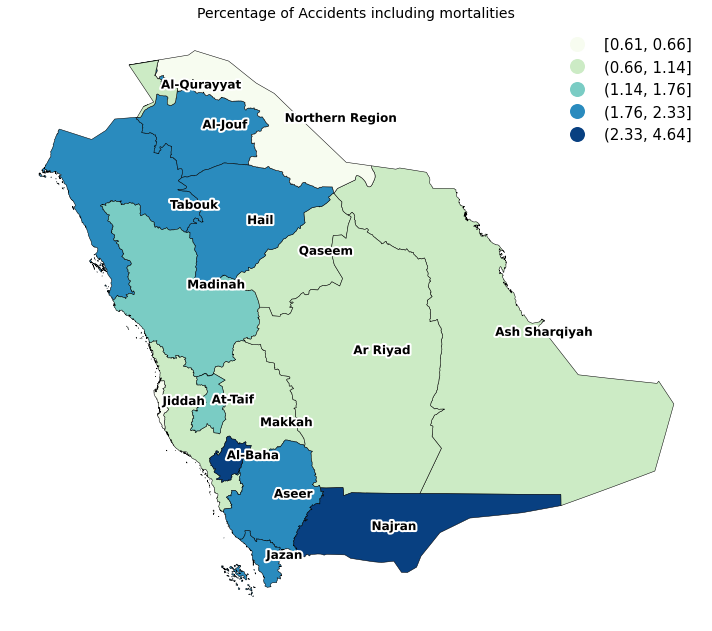

In [24]:
to_plot= ['Number of traffic accidents',
       'Number of people involved in traffic accidents',
       'Number of Accidents including damages',
       'Number of Accidents including injuries',
       'Number of Accidents including mortalities',
       'Percentage of Accidents including damages',
       'Percentage of Accidents including injuries',
       'Percentage of Accidents including mortalities']
fig, ax = plt.subplots(figsize = (10,10))
for i in np.arange(len(to_plot)):
    ax.clear()
    overview.plot(ax=ax, column = to_plot[i], scheme = 'NaturalBreaks', k = 5, cmap = 'GnBu',
                 edgecolor = 'k', linewidth = 0.5, legend = True,
                  legend_kwds = {'fontsize':15,'markerscale':1.5, 'framealpha':0})
    for idx, row in overview.iterrows():
        plt.annotate(text = row.NAME , xy = row.loc_name, fontsize =12, weight = 'bold',
                     path_effects=[PathEffects.withStroke(linewidth=4, foreground="w")])
    ax.set_title(to_plot[i], size = 14)
    #ax.grid(color = 'k', alpha = 0.1)
    ax.axis('off')
    plt.tight_layout()
    plt.savefig(('output/new_overview_'+str(to_plot[i])+'_map.jpg'), dpi = 150)